### IBM Employee attrition

### Overview 

Employee attrition refers to the natural process of employees leaving an organization and needing to be replaced. Attrition can be voluntary, such as when an employee resigns or retires, or involuntary, such as when an employee is terminated or laid off.

To manage attrition, organizations may implement strategies such as improving employee engagement and satisfaction, offering competitive compensation and benefits packages, providing opportunities for career development and advancement, and creating a positive work culture.


In [1]:
# importing libaries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# connecting to the database
conn = sqlite3.connect('attr_data.db')

In [3]:
# import and extract Data from the database
df_demo = pd.read_sql('SELECT * FROM attrition_records', conn)
df_demo

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# checking column names of the dataset
df_demo.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# checking for data types
df_demo.dtypes

id                           int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

INFERENCE:

Our data maninly consists of integers and strings(object)

In [7]:
# having information about the dataset
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [8]:
# column and rows
df_demo.shape

(1470, 36)

INFERENCE:

From the dataset, we have 1470 IBM Employees.

In [10]:
# checking for number of unique values
df_demo.nunique()

id                          1470
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTi

In [11]:
# checking for missing data 
df_demo.isna().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

INFERENCE:

From our analysis above, we see that there is no missing values from the dataset

### Data cleaning


The 'ID' and will be dropped as they are are not useful



In [16]:
#Dropping columns 
columns = ['DailyRate',  'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
            'RelationshipSatisfaction', 'StandardHours']
df_demo.drop(columns, inplace=True, axis=1)

In [19]:
# dropping the ID column as it is not needed 
df_demo.drop(['id'], axis=1, inplace=True)

### EXPLORATORY DATA ANALYSIS

In [20]:
# checking for the first 5 dataset
df_demo.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,11,3,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,15,3,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,12,3,1,6,3,3,2,2,2,2


In [14]:
# value counts for Attrition feature
df_demo['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:>

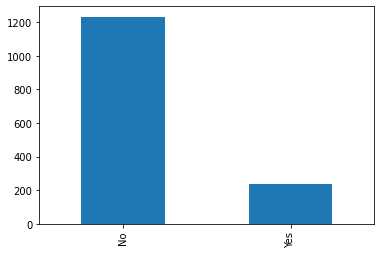

In [15]:
# plotting the Attrition feature
df_demo['Attrition'].value_counts().plot.bar()

INFERENCE:

From the above bar plot, we see that out of 1470 IBM EMPLOYEES, 237 EMPLOYEES left while 1233 stayed.

Text(0.5, 1.0, 'Distribution of Employee Attrition')

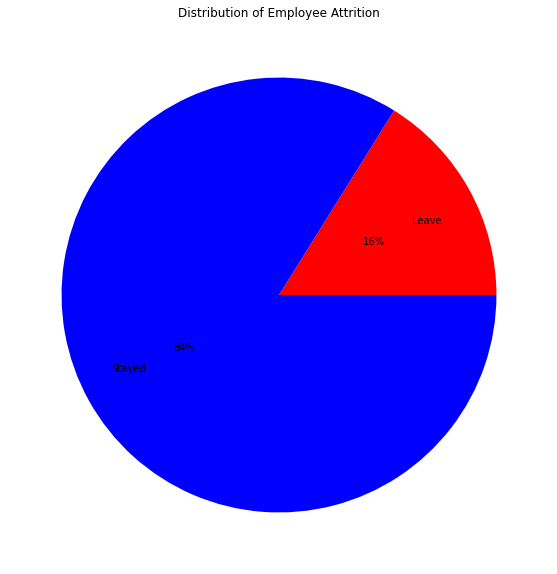

In [21]:
# plotting a Distribution to check the attrition rate
plt.figure(figsize=(10,10))
plt.pie(x=[237, 1233], labels=['Leave','Stayed'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['r','b'])
plt.title('Distribution of Employee Attrition')

### INFERENCE

As shown above, the leaving probability of the sample is 16%. What this means is that, 84% of IBM Employee will not leave, while 16% IBM Employee will leave.

In [23]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   JobInvolvement           1470 non-null   int64 
 10  JobLevel                 1470 non-null   int64 
 11  JobRole                  1470 non-null   object
 12  JobSatisfaction          1470 non-null   int64 
 13  MaritalStatus            1470 non-null   object
 14  MonthlyIncome            1470 non-null  

### Visualizing Categorical Features

1. BusinessTravel

2. Department

3. EducationField

4. Gender

5. JobRole 

6. MaritalStatus

7. Over18

8. OverTime

In [24]:
# value counts 0n BusinessTravel
df_demo['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [25]:
# value counts 0n BusinessTravel
df_demo['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

[Text(0.5, 0, 'Education Field'), Text(0, 0.5, 'Frequency of Education Field')]

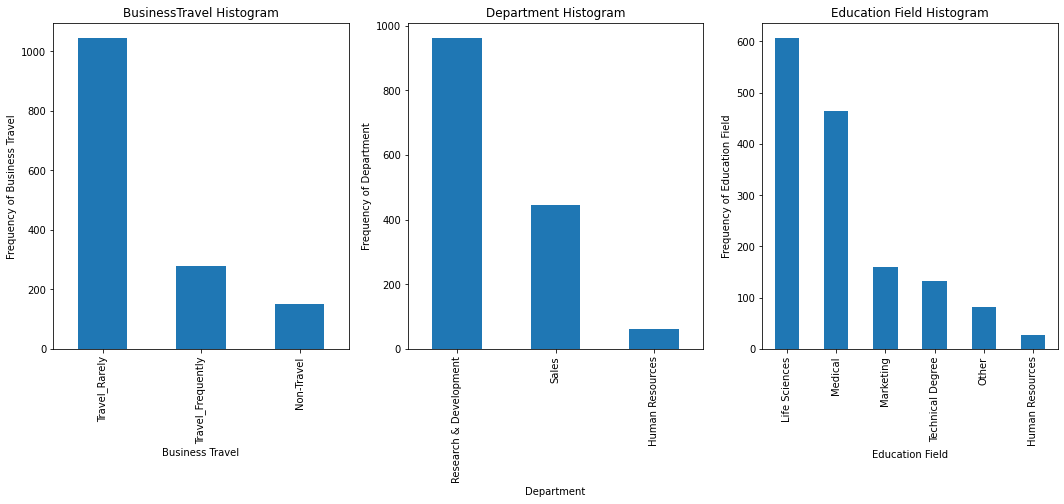

In [26]:
# plotting Histogram for BusinessTravel, Department & EducationField
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt1 = df_demo.BusinessTravel.value_counts().plot(kind='bar')
plt.title('BusinessTravel Histogram')
plt1.set(xlabel = 'Business Travel', ylabel='Frequency of Business Travel')

plt.subplot(1,3,2)
plt1 = df_demo.Department.value_counts().plot(kind='bar')
plt.title('Department Histogram')
plt1.set(xlabel = 'Department', ylabel='Frequency of Department')

plt.subplot(1,3,3)
plt1 = df_demo.EducationField.value_counts().plot(kind='bar')
plt.title('Education Field Histogram')
plt1.set(xlabel = 'Education Field', ylabel='Frequency of Education Field')

### Inference:

From the BusinessTravel Features, Employee who Travel_Rarely is more, than those who Travel_Frequently compared to Non-Travel Employee. 

From the Department Features, Employee who are in the Research & Development Department is more, compared to those in Sales Department and Human Resource Department. 

From the Education Field Features. It can be inferred that: The Employee in the dataset belong more to Life Sciences and Medical Education Field, compared to others.

[Text(0.5, 0, 'Marital Status Field'),
 Text(0, 0.5, 'Frequency of Marital Status')]

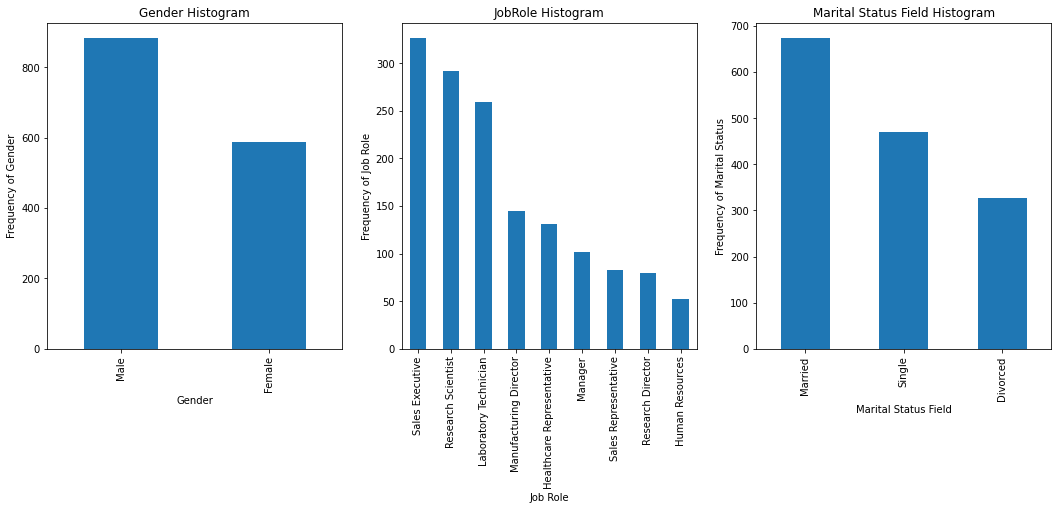

In [27]:
# plotting Histogram for Gender, JobRole & MaritalStatus
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt1 = df_demo.Gender.value_counts().plot(kind='bar')
plt.title('Gender Histogram')
plt1.set(xlabel = 'Gender', ylabel='Frequency of Gender')

plt.subplot(1,3,2)
plt1 = df_demo.JobRole.value_counts().plot(kind='bar')
plt.title('JobRole Histogram')
plt1.set(xlabel = 'Job Role', ylabel='Frequency of Job Role')

plt.subplot(1,3,3)
plt1 = df_demo.MaritalStatus.value_counts().plot(kind='bar')
plt.title('Marital Status Field Histogram')
plt1.set(xlabel = 'Marital Status Field', ylabel='Frequency of Marital Status')

### Inference:

From the Gender Features, Employee who are Male is more, than those who are Female Employees.

From the Job Role Features, Employee who are Sales Executive, Research Scientist & Laborative Technicians are more compared to those in other Job Role. 

From the Maritial Status Field Features. It can be inferred that: The IBM Employee are more of Married category, single, compared to Divorced.

[Text(0.5, 0, 'Over Time'), Text(0, 0.5, 'Frequency of  OverTime')]

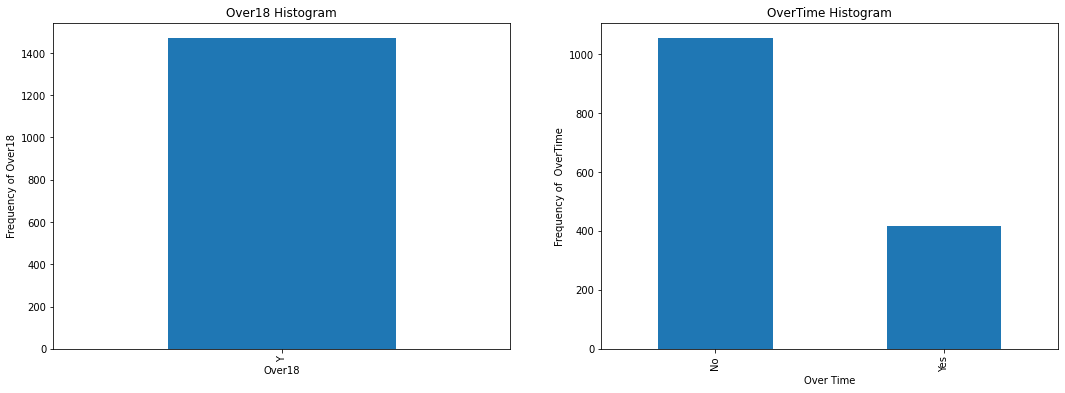

In [28]:
# plotting Histogram for Over18 & OverTime 
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt1 = df_demo.Over18.value_counts().plot(kind='bar')
plt.title('Over18 Histogram')
plt1.set(xlabel = 'Over18', ylabel='Frequency of Over18')

plt.subplot(1,2,2)
plt1 = df_demo.OverTime.value_counts().plot(kind='bar')
plt.title('OverTime Histogram')
plt1.set(xlabel = 'Over Time', ylabel='Frequency of  OverTime')

### Inference:

From the Over18 Features, all Employee are over18.

From the Over Time Features, Employee who do not work Over-time is more compared to Employees who over-time

([], [])

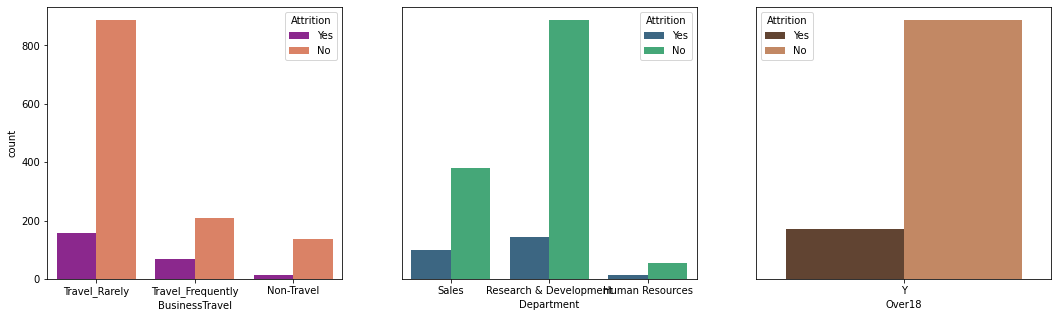

In [29]:
# making a plot for BusinessTravel, Department, Over18 feature and comparing it to Attrition feature
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(x='BusinessTravel' ,hue='Attrition', data=df_demo,palette='plasma')

plt.subplot(1,3,2)
sns.countplot(x='Department',hue='Attrition',data=df_demo,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(1,3,3)
sns.countplot(x='Over18',hue='Attrition',data=df_demo,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

### Inference:

Making Comparism from Business Travel Feature, it shows that Employees who Rarely make business Travel have higher probablity of Leaving than Employees who frequently make business travel and Non-Business Travel.

Checking the results of Department Features, it shows that, Employees who belong to the Research & Development Department, compared to those in Sales and Human Resources.

Checking the results of Over18, it Shows that, since all Employess are Over18, few people leave.

([], [])

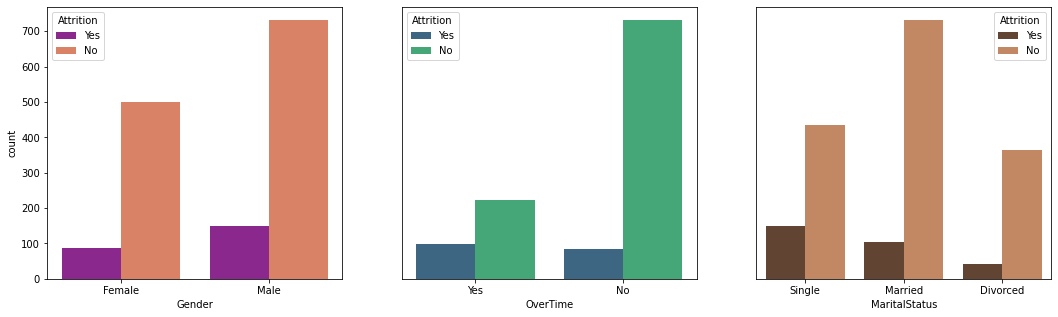

In [30]:
# making a plot for Gender, OverTime, MaritalStatus feature and comparing it to Attrition feature
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(x='Gender' ,hue='Attrition', data=df_demo,palette='plasma')

plt.subplot(1,3,2)
sns.countplot(x='OverTime',hue='Attrition',data=df_demo,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(1,3,3)
sns.countplot(x='MaritalStatus',hue='Attrition',data=df_demo,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

### Inference:

Making Comparism between Gender shows that Employees who are Female have higher probablity of Leaving than the Male Employees.

Checking the results of OverTime Features, it shows that, Employees who do not work over-time tend not to leave compared to those work over-time.

Checking the results of Marrital Status Categories, it Shows that, Single and Divorced Employees tend to leave compared to those who are Married. 

### 1. What is the effect of age on attrition?

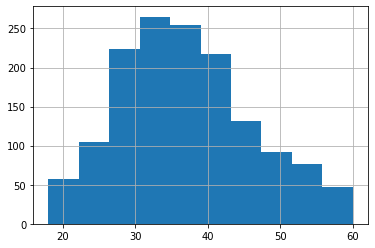

In [31]:
# ploting the age feature
df_demo['Age'].hist();

### Inference:

Checking the results of the Age of Employees, it Shows that, it is shown from the unique opreration that all Employess are Over18. This means no Employee falls below 18 years of Age.

We can see from the histogram plot,that Employee are between Age 18 - 60.

Text(0.5, 1.0, 'Employee Attrition by Age')

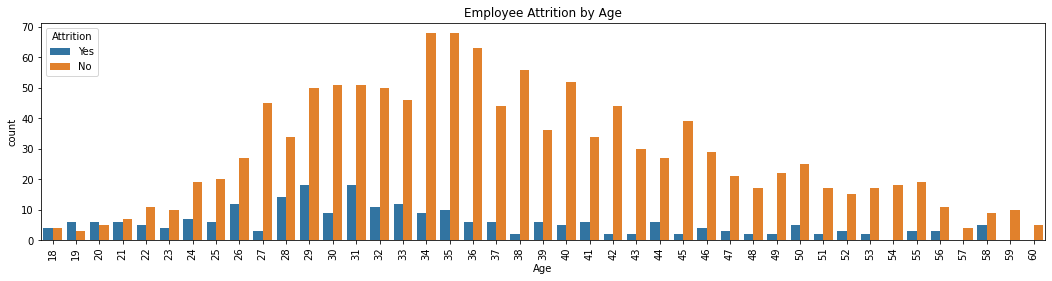

In [32]:
# Employees Attrition vs Age 
plt.figure(figsize=(18,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_demo.Age, hue=df_demo.Attrition)
ax.set_title("Employee Attrition by Age")

### Inference:

The summary statistics shows that the records of Employee Attrition have people who are 60 years of age, however, more people are between the age of 27 and 45.

The effect of age on attrition is that as Employees age increase(as they get older) they are likely not to leave. 